# 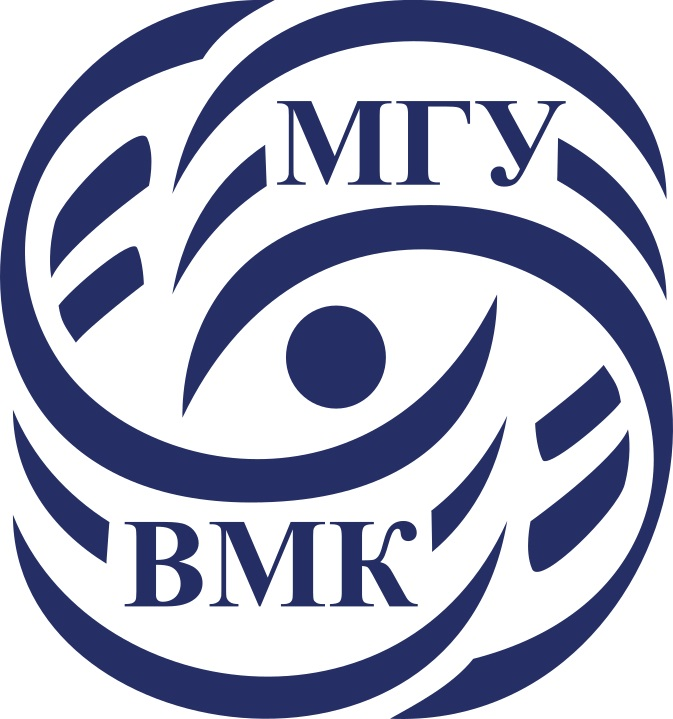

# Машинное обучение. ВМК МГУ

# Практическое задание 8: Частичное Обучение. Методы снижения размерности.
## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>


# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>









<font color="white" style="opacity:0.2024"></font>
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 60 минут </font>**

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

Перед началом выполнения переведите ноутбук в `Доверенный режим` (`Trusted`) для корректного отображения изображений:

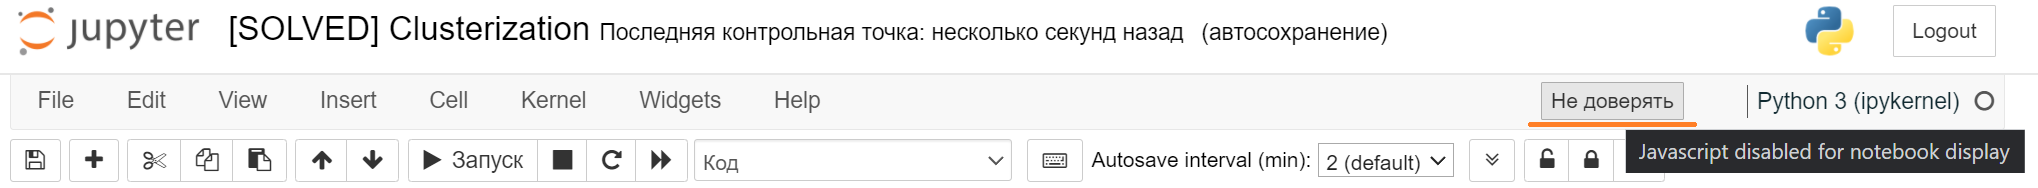

In [ ]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

# 0. Введение.

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

-----

<font color='OrangeRed'>**Важно!**</font> В этом задании мы будем использовать полное виртуальное окружение, так как понадобятся библиотеки `torch` и `tensorflow`

Обратите внимание, что установка `torch` и `tensorflow` через `pip `может сломать ваше окружение, особенно если вы используете GPU. Выполняйте их установку в соответствии с Вашей конфигурацией системы или в отдельном виртуальном окружении

In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 19ZRLAdlNBI5OScrbxXzO3iaWJSkJlXeA
! pip install -r /content/requirements_2024_25_for_colab_full.txt

Downloading...
From: https://drive.google.com/uc?id=19ZRLAdlNBI5OScrbxXzO3iaWJSkJlXeA
To: /content/requirements_2024_25_for_colab_full.txt
100% 424/424 [00:00<00:00, 1.83MB/s]


In [ ]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# О задании

В данной работе вам будет предложено применить кластеризацию и снижение размерности в задачах **Частичного Обучения** (Semi-Supervised learning).

Здесь перечислены основные функции и библиотеки, которые могут понадобиться Вам в процессе выполнения задания. Подключение других библиотек возможно, но нежелательно. **Работа каких-либо других библиотек не гарантируется.**

In [ ]:
import os

# Подавим уведомления о проблемах c tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import warnings

import numpy as np

import tqdm.auto as tqdm

import scipy.spatial.distance

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from torchvision.datasets import MNIST

import sklearn

from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier

# Библиотека umap-learn, а не umap
from umap import UMAP

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

# Подавим уведомления о проблемах со сходимостью в sklearn
simplefilter("ignore", category=ConvergenceWarning)

**<font color='OrangeRed'>Обратите внимание</font>, что динамическое содержимое может некорректно сохраняться в jupyter notebook. Используйте его только для локальной визуализации. Все графики, необходимые для сдачи задания должны быть статическими. Переход в статический режим происходит с помощью магической команды `%matplotlib inline`.**

**<font color='OrangeRed'>Обязательно убедитесь, что все графики корректно сохранились корректно в ноутбуке перед сдачей в систему.</font>** Для этого достаточно открыть загруженный в систему файл и, просмотрев его, убедиться, что все сохранилось корректно

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

## Ещё несколько важных замечаний

При выполнении задания <font color='OrangeRed'>запрещено</font>:
1. Менять те seed, которые явно указаны в коде
2. Менять прототипы функций, классов, методов классов
3. Менять константы, используемые для генерации выборок

При оформлении задания обратите внимание на форматирование кода и на оформление графиков:

* Весь код должен быть оформлен в строгом соответствии с [PEP8](https://pep8.org/) (для юнит-тестов обязательно, для ноутбука очень желательно)

Графики должны быть с одной стороны понятными и информативными, а с другой стороны *красивыми*. Вот несколько пунктов, которые помогут удовлетворить этим требования:
1. Все графики должны быть отрисованы в **векторном формате**. Обратите внимание, что смена режима графиков с динамического на статический и обратно может приводить к сбросу параметров отрисовки графиков. Переход в векторный режим можно выполнить с помощью команды `matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')`. Если изображения в векторном формате приводят к слишком большому размеру Jupyter Notebook можете использовать растровые изображения с **высоким dpi**. Напирмер, можно установить глобальный dpi в matplotlib: `matplotlib.rcParams['figure.dpi'] = 300`
2. На всех графиках без исключения должна быть нарисована сетка
3. Все графики и группы графиков должны иметь заголовок (`title`)
4. При необходимости оси должны быть подписаны
5. Если на графике отображено несколько сущностей (линии/точки/bar разных цветов, формы и так далее), то необходима исчерпывающая легенда
6. Все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном и так далее)
7. Масштаб по каждой оси на графике должен быть выбран правильно. Используйте масштабы `log`, `symlog` по необходимости
8. Если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах)
9. Частота отметок по каждой оси должна быть тщательно подобрана, по необходимости задавайте `[xy]ticks`, `[xy]ticklabels` вручную. Подписи тиков на осях не должны сливаться как на одной оси, так и между ними
10. Помните, что matplotlib умеет выполнять [рендеринг Latex](https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html). Используйте эту возможность для написания формул в заголовках, легенде и в подписях осей
11. Используйте *красивую* цветовую палитру с хорошо различимыми цветами. Примеры цветовых палитр можно посмотреть [здесь](https://matplotlib.org/stable/gallery/color/colormap_reference.html). При наличи особенностей восприятия цвета можно использовать специальные палитры:
```python
plt.style.use('seaborn-colorblind')
# Или
plt.style.use('tableau-colorblind10')
# Затем, при отрисовке графиков не используйте параметр cmap
```
12. Графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

# <font color='DarkOrange'>**1. Частичное обучение.  [кросспроверка 6 баллов,  unittests 4 баллa]**</font>

В этой части мы рассмотрим применение алгоритмов снижения размерности и кластеризации в контексте задач классификации в постановке Semi-Supervised learning.

Рассмотрим задачу классификации изображений из датасета MNIST. Предположим, что известна только небольшая часть разметки по которой мы хотим обучить классификатор. В отличии от классических задач обучения с учителем здесь мы можем использовать большой объём неразмеченных объектов.

<font color='LightSteelBlue'>**Пояснение:**</font> Будем далее считать, что неразмеченные объекты имеют метку `-1`

Существует много вариантов решения данной задачи. Предлагается рассмотреть следующие из них:
1. Обучение модели, например, логистической регрессии на размеченной части
2. Методы SelfTraining, в частости `SelfTrainingClassifier` с логистической регрессией в качестве базовой модели
3. Использование кластеризации для определения групп похожих объектов и размеченной подвыборки для определения меток кластеров

Каждый из данных вариантов можно обучать на разных признаковых пространствах. Предлагается проверить, как методы снижения размерности будут влиять на качество итогового алгоритма. Нужно учесть, что не все алгоритмы снижения размерности допускают преобразование новых объектов в низкоразмерное пространство, поэтому предлагается сравнить `UMAP` с исходным признаковым пространством.


#### <font color='DarkOrange'>**Задание 1.1 [unittests, 4 баллa]**</font>

Реализуйте третью из предложенных моделей. Подробная спецификация и описание входных данных к тестам указаны в <font color='DarkSeaGreen'>**описании задания**.</font>

<font color='OrangeRed'>**Замечание:**</font> В данном пункте разрешено использовать `sklearn.cluster.KMeans`

In [ ]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans


class KMeansClassifier(sklearn.base.BaseEstimator):
    def __init__(self, n_clusters):
        super().__init__()
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters)
        self.mapping = None

    def fit(self, data, labels):
        self.kmeans.fit(data)
        cluster_labels = self.kmeans.labels_
        self.mapping, _ = self._best_fit_classification(cluster_labels, labels)
        return self

    def predict(self, data):
        cluster_labels = self.kmeans.predict(data)
        return self.mapping[cluster_labels]

    def _best_fit_classification(self, cluster_assignments, partial_labels):
        labeled_mask = (partial_labels != -1)
        if not np.any(labeled_mask):
            mapping = np.full(self.n_clusters, 0, dtype=int)
            return mapping, mapping[cluster_assignments]
        labeled_samples = partial_labels[labeled_mask]
        cluster_ids = cluster_assignments[labeled_mask]
        unique_classes, counts = np.unique(labeled_samples, return_counts=True)
        global_mode = unique_classes[np.argmax(counts)]
        max_class = np.max(unique_classes)
        counts_matrix = np.zeros((self.n_clusters, max_class + 1), dtype=int)
        for idx in range(len(cluster_ids)):
            cluster = cluster_ids[idx]
            label = labeled_samples[idx]
            counts_matrix[cluster, label] += 1
        cluster_to_class = np.zeros(self.n_clusters, dtype=int)
        for cluster_idx in range(self.n_clusters):
            cluster_counts = counts_matrix[cluster_idx]
            max_count = np.max(cluster_counts)
            if max_count == 0:
                cluster_to_class[cluster_idx] = global_mode
            else:
                candidates = np.where(cluster_counts == max_count)[0]
                cluster_to_class[cluster_idx] = np.min(candidates)
        predicted_labels = cluster_to_class[cluster_assignments]
        return cluster_to_class, predicted_labels

Проверьте `KMeansClassifier._best_fit_classification` на простейших тестах:

In [ ]:
def all_equal(list_left, list_right):
    assert np.all([np.all(left == right) for left, right in zip(list_left, list_right)])

all_equal(
    KMeansClassifier(10)._best_fit_classification(
        np.array([2, 2, 2, 1, 1, 1, 0, 0, 0]),
        np.array([5, 5, 6, 8, 7, 6, 6, 7, 7]),
    ),
    (np.array([7, 6, 5, 6, 6, 6, 6, 6, 6, 6]), np.array([5, 5, 5, 6, 6, 6, 7, 7, 7]))
)

all_equal(
    KMeansClassifier(10)._best_fit_classification(
        np.array([ 4,  4,  4, 1, 1, 1, 2, 2, 2, 3, 3, 3,  0, 0,  0, 0,  0]),
        np.array([-1, -1, -1, 5, 5, 6, 8, 7, 6, 6, 7, 7, -1, 8, -1, 3, -1]),
    ),
    (np.array([3, 5, 6, 7, 6, 6, 6, 6, 6, 6]), np.array([6, 6, 6, 5, 5, 5, 6, 6, 6, 7, 7, 7, 3, 3, 3, 3, 3]))
)

Теперь создадим модель которая будет объединять все вышеописанные способы решения задачи Semi-Supervised learning.

#### <font color='DarkOrange'>**Задание 1.2 [код]**</font>

Реализуйте модель, которая в зависимости от параметра `data_processing` будет выполнять то или иное преобразование признакового пространства. Параметр `model` должен задавать одну из трёх описанных выше моделей поверх преобразованных данных. Вспомогательные аргументы нужно передавать через словари `reducer_kwargs`, `model_kwargs` (например, размерность пространства для методов снижения размерности, коэффициент регуляризации логистической регрессии, число кластеров KMeans и так далее).

<font color='OrangeRed'>**Замечание:**</font> Большую часть времени работы модели (как обучения, как и предсказания) будет занимать преобразование признаков в низкоразмерное пространство с помощью UMAP. Если несколько способов, как ускорить данный процесс:
1. Параметр `n_neighbors` у UMAP значительно влияет на скорость работы. Можно установить его меньше, чем по умолчанию (не желательно ставить его меньше $5-7$). Попробуйте подобрать этот параметр в зависимости от качества визуализации в задании **1.3**
2. Так как UMAP метрический алгоритм, он требует большого числа вычислений попарных расстояний между точками. При выполнении перебора гиперпараметров в заданиях ниже можно значительно сэкономить, предподсчитав попарное расстояние между объектами для обучения и расстояние между объектам для предсказаний и объектами обучающей выборки. Используйте для работы в таком режиме `metric='precomputed'`. В таком режиме UMAP выдаёт ненужные warnings. Подавите их с помощью соответствующего контекстного менеджера:
```python
with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Вызовы UMAP. __init__ / fit / fit_transform / transform
```
Не забудьте про масштабирование признаков

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier
from umap import UMAP


class MetaSemiSupervisedModel(BaseEstimator):
    def __init__(self, data_processing, model_type,
                 reducer_kwargs=None, model_kwargs=None):
        self.data_processing = data_processing
        self.model_type = model_type
        self.reducer_kwargs = reducer_kwargs or {}
        self.model_kwargs = model_kwargs or {}

        self.scaler = StandardScaler()

        if self.data_processing == 'UMAP':
            self.reducer = UMAP(**self.reducer_kwargs)
        else:
            self.reducer = None

        if self.model_type == 'LogisticRegression':
            self.model = LogisticRegression(**self.model_kwargs)
        elif self.model_type == 'SelfTraining':
            base = LogisticRegression(**self.model_kwargs)
            self.model = SelfTrainingClassifier(base)
        elif self.model_type == 'KMeans':
            self.model = KMeansClassifier(**self.model_kwargs)
        else:
            raise ValueError(f"Неизвестный тип модели: {self.model_type}")

    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)
        if self.reducer:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                X_trans = self.reducer.fit_transform(X_scaled)
        else:
            X_trans = X_scaled
        if self.model_type == 'LogisticRegression':
            mask = (y != -1)
            self.model.fit(X_trans[mask], y[mask])
        else:
            self.model.fit(X_trans, y)

        return self

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        if self.reducer:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                X_trans = self.reducer.transform(X_scaled)
        else:
            X_trans = X_scaled

        return self.model.predict(X_trans)


Загрузим датасет MNIST. Для ускорения перебора гиперпараметров, можете уменьшить число объектов в выборке. Не делайте это число менее $4000$.

In [ ]:
mnist_n_objects = 4000

In [ ]:
mnist_test_dataset = MNIST('./mnist', train=False, download=True)
mnist_train_dataset = MNIST('./mnist', train=True, download=False)

mnist_labels_test = np.array(mnist_test_dataset.targets)
mnist_labels_train = np.array(mnist_train_dataset.targets)

mnist_images_test = mnist_test_dataset.data.numpy()
mnist_images_train = mnist_train_dataset.data.numpy()

mnist_images_test, _, mnist_labels_test, _ = train_test_split(
    mnist_images_test, mnist_labels_test,
    train_size=mnist_n_objects, stratify=mnist_labels_test, random_state=6886
)
mnist_images_train, _, mnist_labels_train, _ = train_test_split(
    mnist_images_train, mnist_labels_train,
    train_size=mnist_n_objects, stratify=mnist_labels_train, random_state=6886
)

mnist_data_test = (mnist_images_test.astype(np.float32) / 255.0).reshape([mnist_images_test.shape[0], -1])
mnist_data_train = (mnist_images_train.astype(np.float32) / 255.0).reshape([mnist_images_train.shape[0], -1])

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:00<00:00, 17830008.73it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 484457.51it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 4482397.69it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 7984295.38it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



#### <font color='DarkOrange'>**Задание 1.3 [код]**</font>

Примените метод снижения размерности на ваш вкус для новых данных и изобразите результат на графике. Используйте это представление для визуализации в дальнейшем.

<font color='OrangeRed'>**Замечание:**</font> Не забудьте, что масштаб признаков существенно влияет на работу алгоритма снижения размерности.

<font color='OrangeRed'>**Замечание:**</font> Для отрисовки низкоразмерных данных можно использовать функцию `plot_interactive`. Данная функция может работать и в интерактивном режиме, которым можно воспользоваться, если ваша среда выполнения его поддерживает. Не забудьте переключиться в статический режим после отрисовки динамического контента с помощью магической команды `%matplotlib inline`.

In [ ]:
def plot_interactive(lowd_data, images, labels, names, n_dots=1000, image_scale=1.0):
    with matplotlib.rc_context(rc={
        'font.size': image_scale * matplotlib.rcParams['font.size'],
        'xtick.major.size': image_scale * matplotlib.rcParams['xtick.major.size'],
        'xtick.minor.size': image_scale * matplotlib.rcParams['xtick.minor.size'],
        'ytick.major.size': image_scale * matplotlib.rcParams['ytick.major.size'],
        'ytick.minor.size': image_scale * matplotlib.rcParams['ytick.minor.size'],

        'axes.linewidth': image_scale * matplotlib.rcParams['axes.linewidth'],
        'grid.linewidth': image_scale * matplotlib.rcParams['grid.linewidth'],
        'patch.linewidth': image_scale * matplotlib.rcParams['patch.linewidth'],
        'xtick.major.width': image_scale * matplotlib.rcParams['xtick.major.width'],
        'xtick.minor.width': image_scale * matplotlib.rcParams['xtick.minor.width'],
        'ytick.major.width': image_scale * matplotlib.rcParams['ytick.major.width'],
        'ytick.minor.width': image_scale * matplotlib.rcParams['ytick.minor.width'],

        'lines.markeredgewidth': image_scale * matplotlib.rcParams['lines.markeredgewidth'],
    }):
        fig, ax = plt.subplots(1, 1, figsize=(image_scale * 10, image_scale * 5))
        fig.set_dpi(300)
        ax.grid(True)

        n_clusters = len(np.unique(labels))

        scatter = plt.scatter(
            lowd_data[:n_dots, 0], lowd_data[:n_dots, 1], s=image_scale * 10,
            c=labels[:n_dots], cmap=plt.get_cmap('tab20', n_clusters), edgecolors='none'
        )

        cbar = plt.colorbar(scatter, ax=ax, label='Название кластера')
        cbar.set_ticks(np.min(labels[:n_dots]) + (np.arange(n_clusters) + 0.5) * (n_clusters - 1) / n_clusters)
        cbar.set_ticklabels(names)

        offset_image = OffsetImage(images[0], zoom=image_scale * 2.0)
        ann_bbox = AnnotationBbox(
            offset_image, (0,0), xybox=(image_scale * 50., image_scale * 50.), xycoords='data',
            boxcoords="offset points", pad=0.3, arrowprops=dict(
                arrowstyle='->, head_length={0:.2f}, head_width={1:.2f}'.format(
                    image_scale * 0.4, image_scale * 0.2
                )
            )
        )
        ax.add_artist(ann_bbox)
        ax.set_title('Распределение данных CIFAR10 в проекции на 2 случайные оси')
        ann_bbox.set_visible(False)

        def image_hover(event):
            if scatter.contains(event)[0]:
                ind, *_ = scatter.contains(event)[1]["ind"]
                w, h = fig.get_size_inches() * fig.dpi
                ws = (event.x > w / 2.) * -1 + (event.x <= w / 2.)
                hs = (event.y > h / 2.) * -1 + (event.y <= h / 2.)
                ann_bbox.xybox = (image_scale * 50.0 * ws, image_scale * 50.0 * hs)
                ann_bbox.set_visible(True)
                ann_bbox.xy =(lowd_data[ind, 0], lowd_data[ind, 1])
                offset_image.set_data(images[ind])
            else:
                ann_bbox.set_visible(False)
            fig.canvas.draw_idle()

        fig.canvas.mpl_connect('motion_notify_event', image_hover)

        plt.show()

In [ ]:
%matplotlib ipympl
matplotlib.rcParams['figure.dpi'] = 300

# Для работы в Google Colab нужно выполнить специфичную магию
# Обычно, она не срабатывает с первого раза, поэтому может потребоваться
#   несколько раз выполнить ячейку и несколько раз попробовать нарисовать график
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except:
    pass

In [ ]:
# стандартизируем и уменьшаем размерность до 2D
scaler_2d = StandardScaler()
X_scaled = scaler_2d.fit_transform(mnist_data_train)

#пробуем n_neighbors=15 для UMAP (можно менять и сравнивать)
umap_2d = UMAP(n_components=2, n_neighbors=15, metric='euclidean', random_state=6886)
X_2d = umap_2d.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
lowd_mnist_data_train = umap_2d.fit_transform(X_scaled)

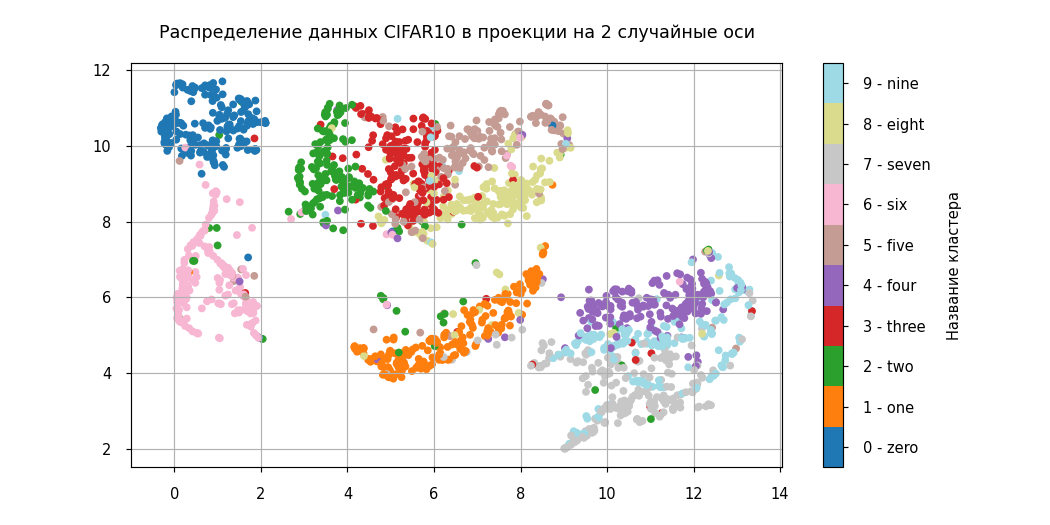

In [ ]:
# Если картинка окажется слишком маленькой/большой, то поменяйте image_scale на подходящее значение
plot_interactive(
    lowd_mnist_data_train, mnist_images_train, mnist_labels_train,
    mnist_test_dataset.classes, n_dots=2000, image_scale=0.35
)

Вернёмся в статичный режим отрисовки изображений:

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

#### <font color='DarkOrange'>**Задание 1.4 [код]**</font>

Разбейте выборку следующим образом:
1. Разбейте случайным образом обучающую выборку на 2 части — размеченную и неразмеченную. Считайте, что доля размеченных объектов — `fraction_of_labeled`. Метки неразмеченной части замените на $-1$.
2. Тестовую выборку разбейте в соотношении $30$ на $70$ — меньшую часть (далее будет называться **валидационной выборкой**) используйте для подбора гиперпараметров, а большую (**тестовая выборка**) для итоговой оценки качества.

In [ ]:
fraction_of_labeled = 0.01

In [ ]:
rng = np.random.RandomState(42)

#Разделение вот такое: часть с метками, часть без
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    mnist_data_train,
    mnist_labels_train,
    train_size=fraction_of_labeled,
    stratify=mnist_labels_train,
    random_state=rng
)

 #Объединяем обратно
X_train_semi = np.vstack([X_labeled, X_unlabeled])
y_train_semi = np.concatenate([y_labeled, np.full_like(y_unlabeled, -1)])

X_val, X_test, y_val, y_test = train_test_split(
    mnist_data_test,
    mnist_labels_test,
    test_size=0.7,
    stratify=mnist_labels_test,
    random_state=rng
)


#### <font color='DarkOrange'>**Задание 1.5 [кросспроверка, 2 баллa][код]**</font>

Используя `MetaSemiSupervisedModel` подберите оптимальные параметры:

* `C` — не менее $15$ точек в диапазоне $5-6$ десятичных порядков
* `n_clusters` — не менее $10$ точек вплоть до $100$
* `n_components` — не менее $7$ точек вплоть до $100$

для следующих моделей:
1. Исходные признаки + `LogisticRegression`
2. Исходные признаки + `SelfTrainingClassifier`
3. Исходные признаки + `KMeansClassifier`
4. `UMAP` + `LogisticRegression`
5. `UMAP` + `SelfTrainingClassifier`
6. `UMAP` + `KMeansClassifier`

Подбор каждого гиперпараметра должен быть сопровождён графиками точности на тестовой и валидационной выборках. Изобразите обе линии на одном графике.

<font color='OrangeRed'>**Замечание:**</font> При переборе **обязательно выводите значение найденного оптимального параметра и качество модели с оптимальным гиперпараметром** на выборке для итоговой оценки качества.

В последних трёх моделях используйте гиперпараметры базовых моделей, найденные в первых трёх моделях.

Tuning Raw+LR: 100%|██████████| 15/15 [00:03<00:00,  4.42it/s]


Raw+LR: best C = 0.0164, val_acc = 0.6142, test_acc = 0.6346


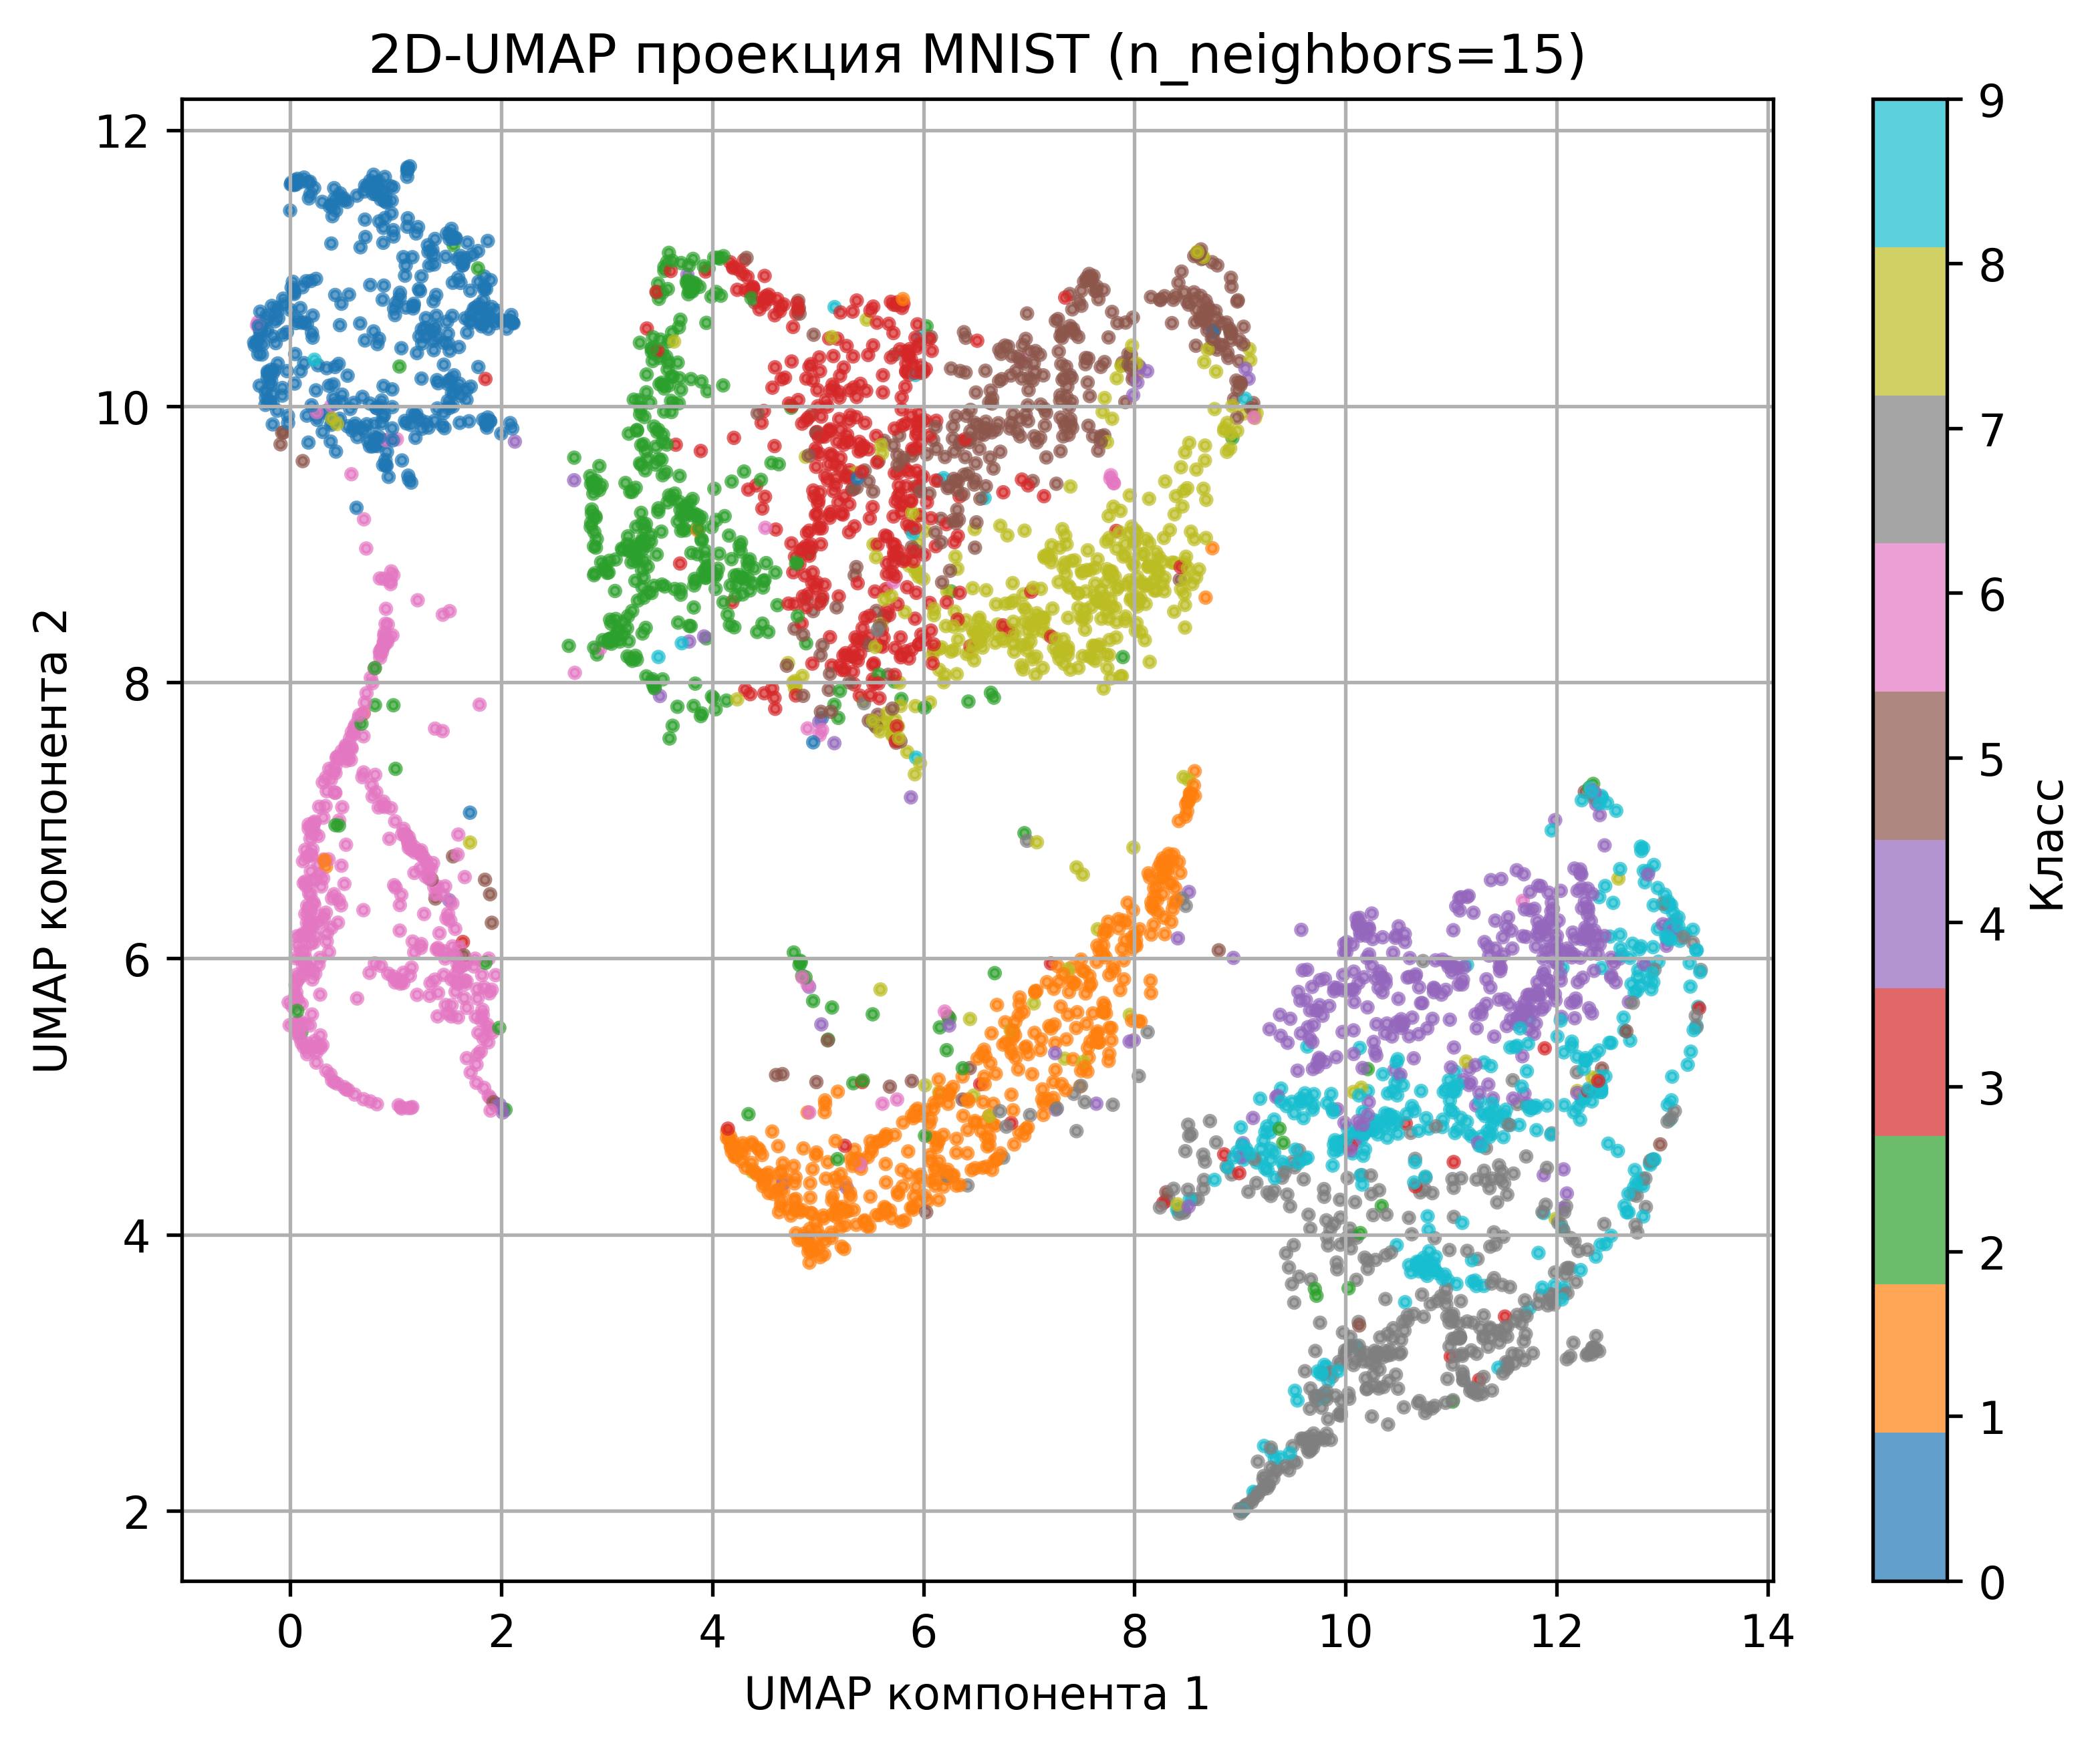

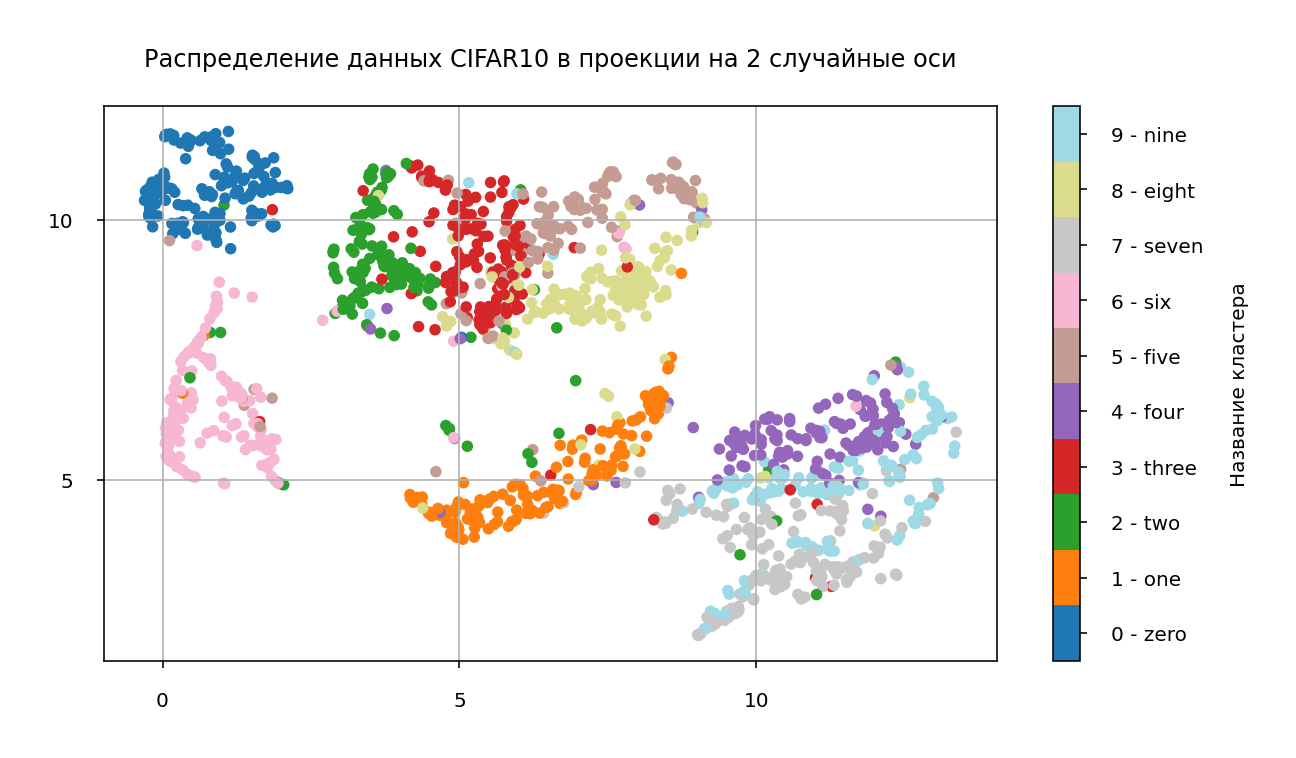

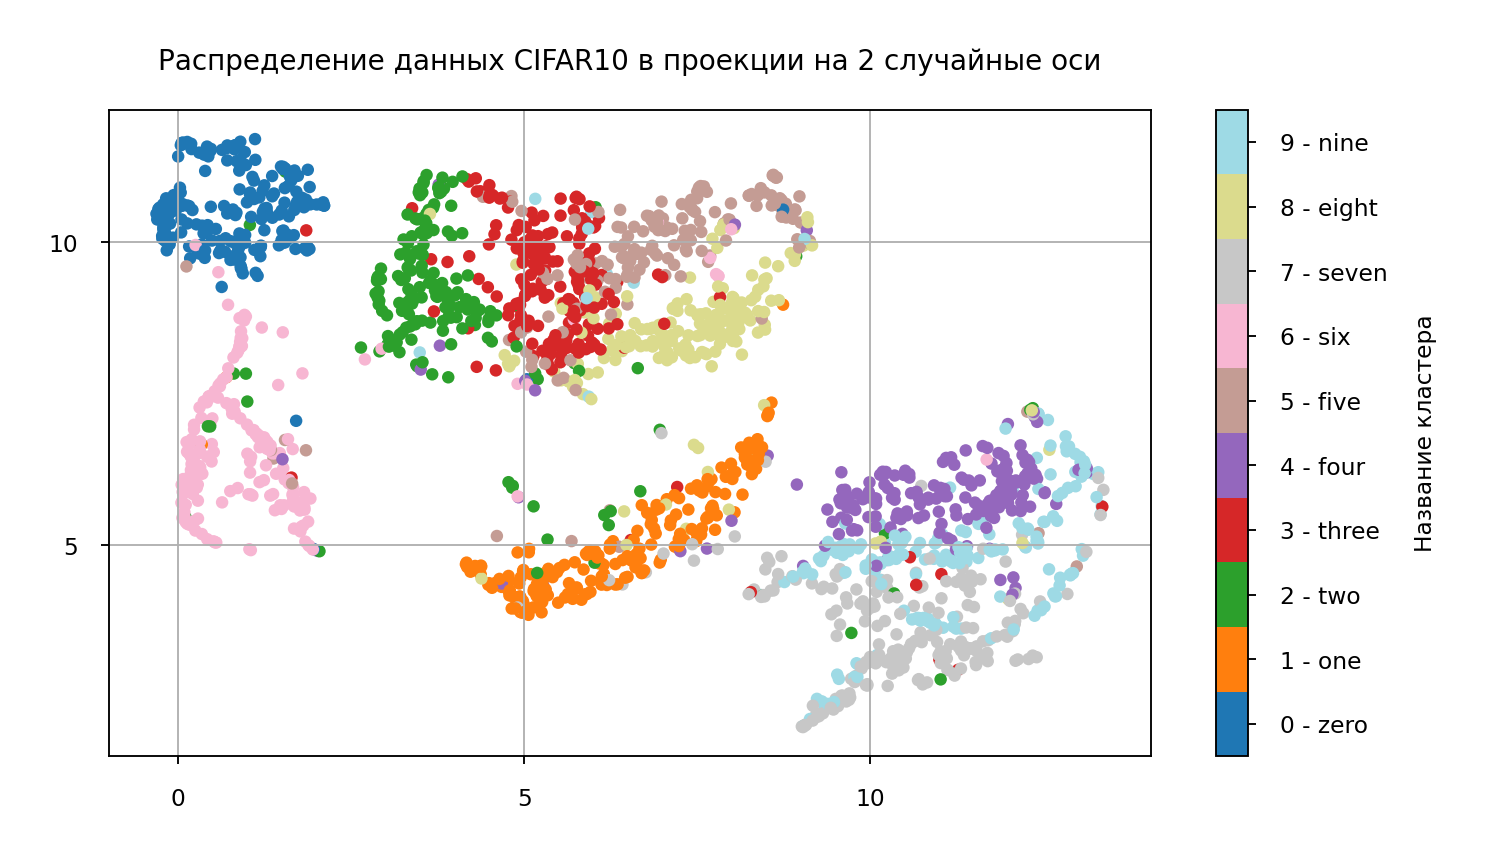

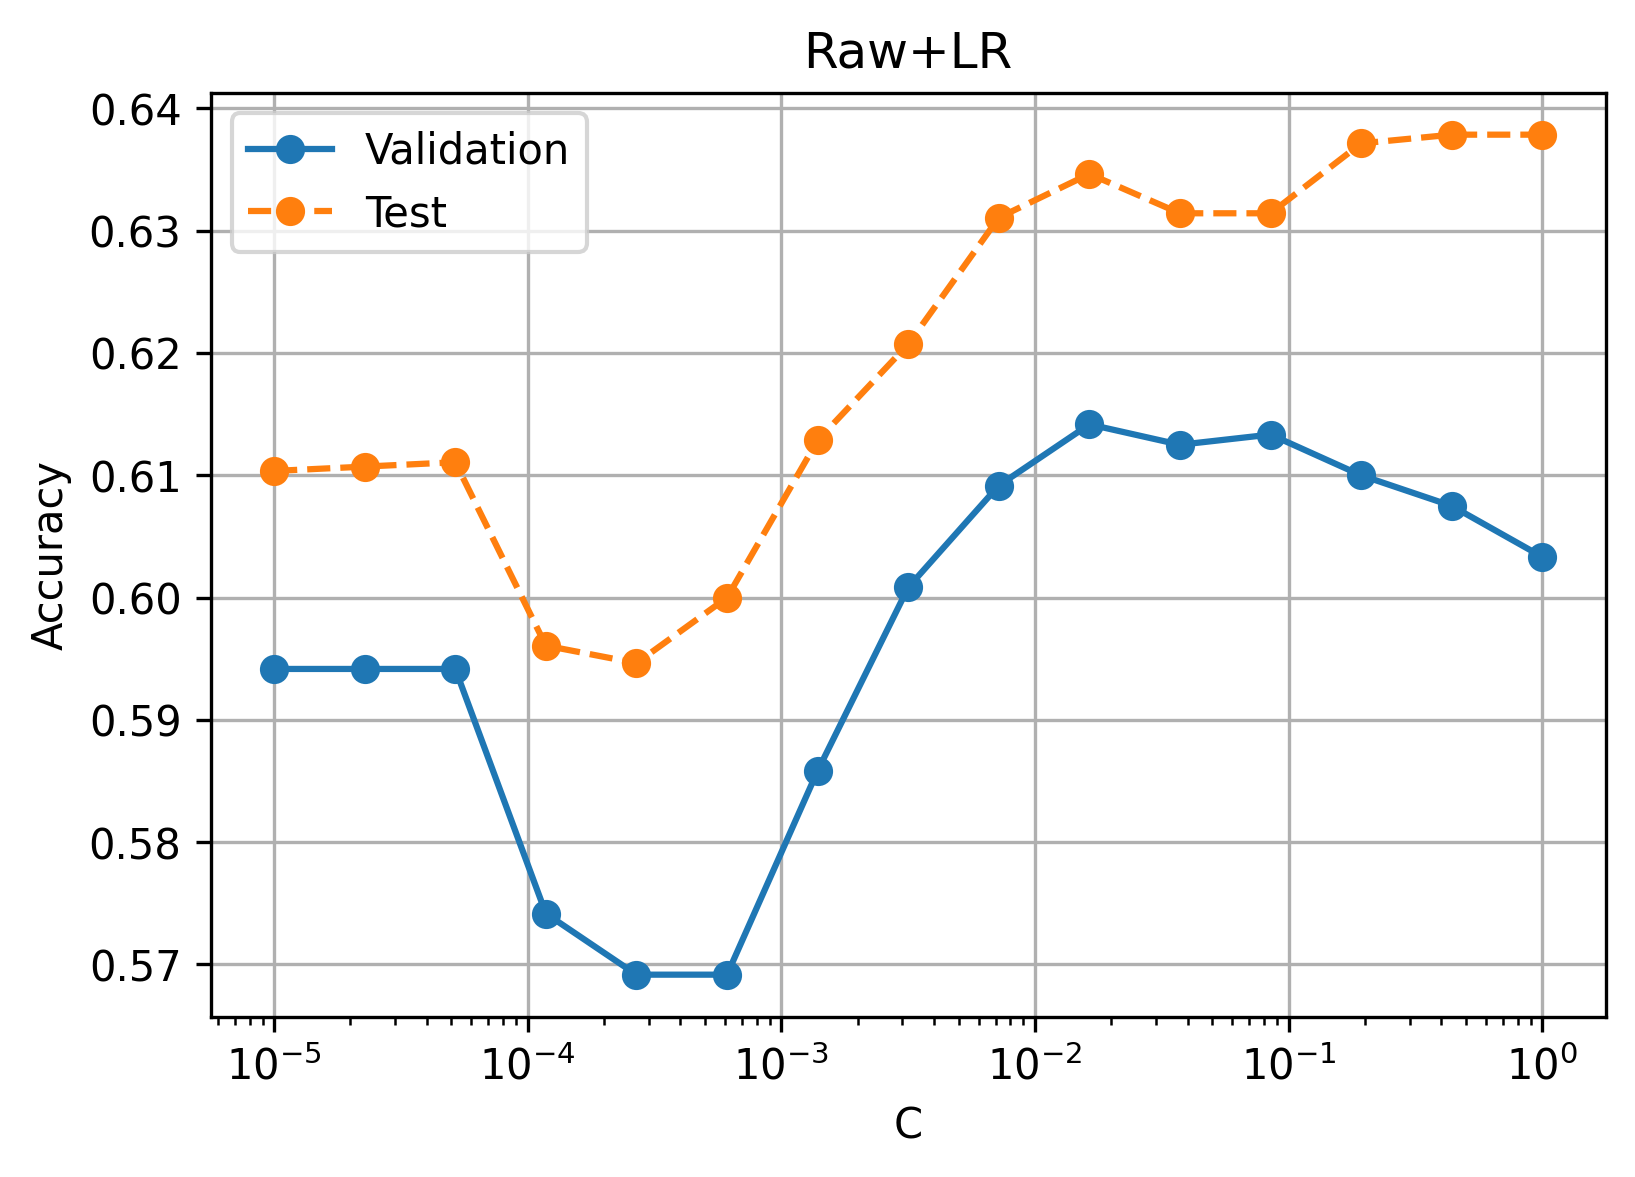

Tuning Raw+ST: 100%|██████████| 15/15 [01:24<00:00,  5.64s/it]


Raw+ST: best C = 0.193, val_acc = 0.6983, test_acc = 0.7111


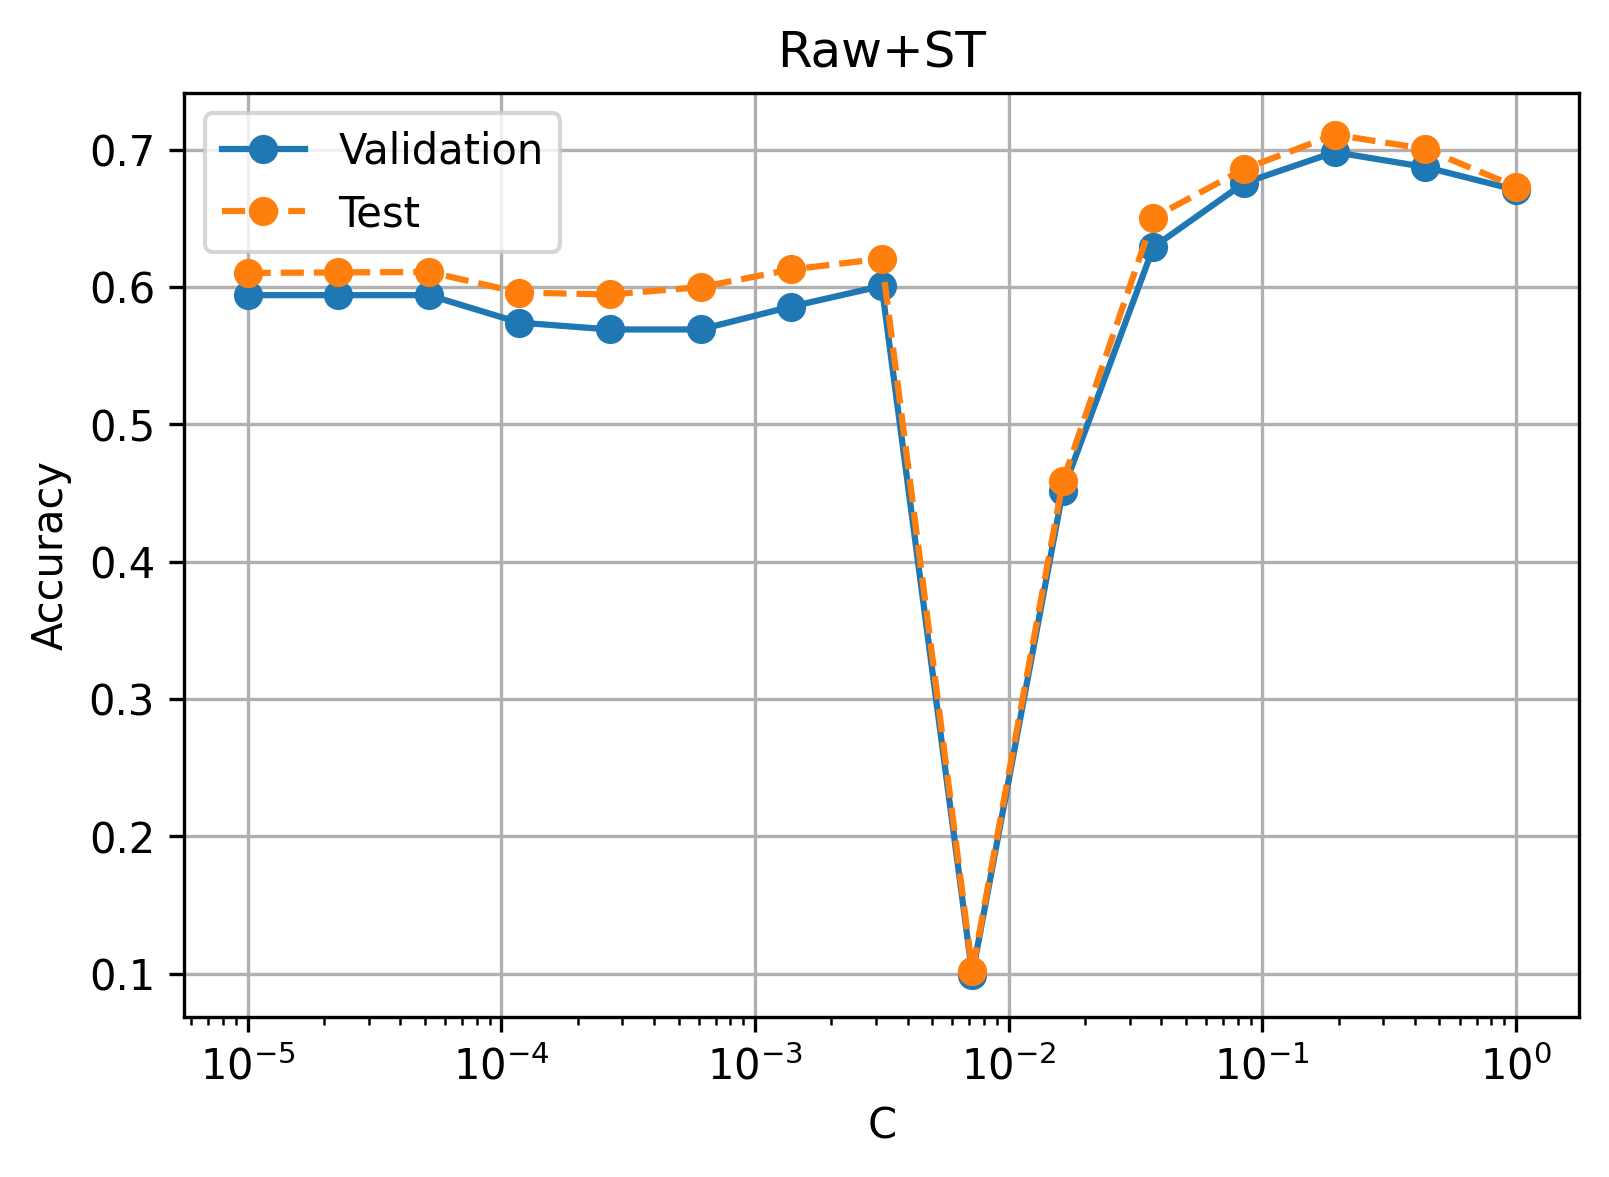

Tuning Raw+KMeans:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Tuning Raw+KMeans:  10%|█         | 1/10 [00:05<00:47,  5.28s/it]/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Tuning Raw+KMeans:  20%|██        | 2/10 [00:10<00:41,  5.16s/it]/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=1

Raw+KMeans: best n_clusters = 40, val_acc = 0.5333, test_acc = 0.5264


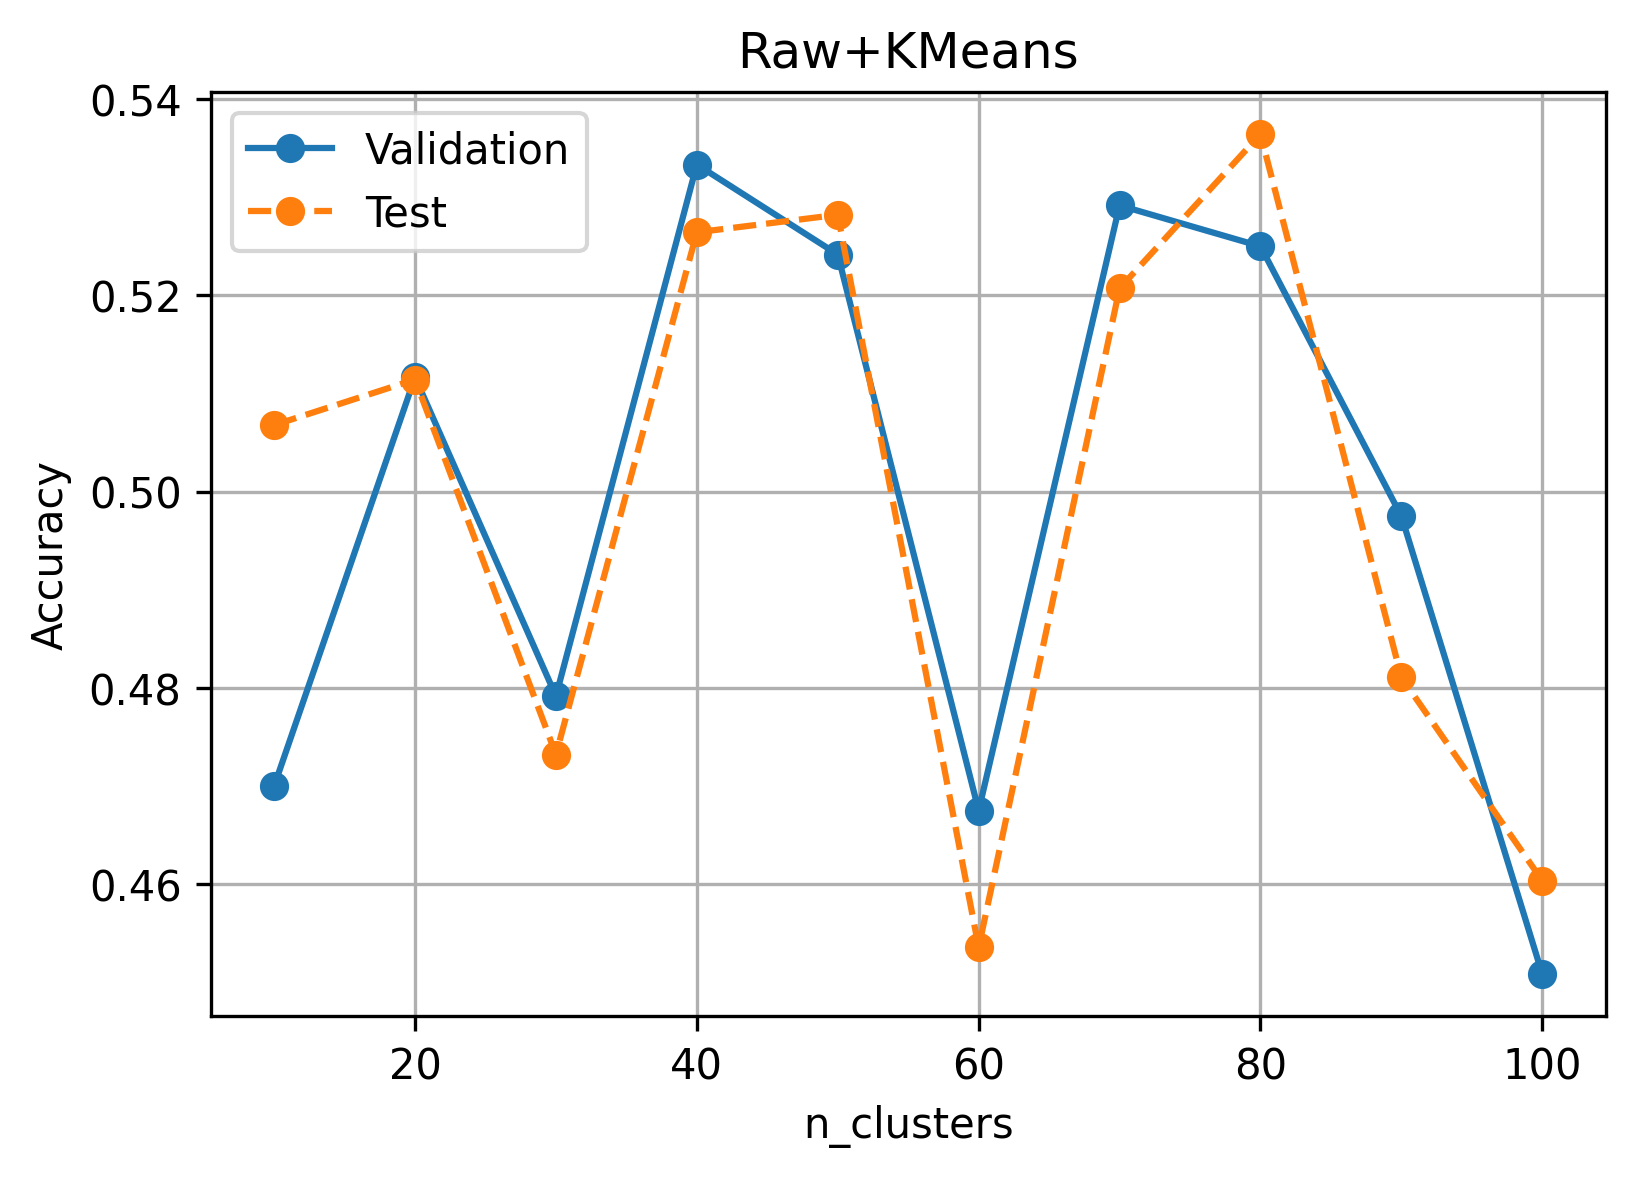

Tuning UMAP+LR: 100%|██████████| 7/7 [06:19<00:00, 54.17s/it]


UMAP+LR: best n_components = 40, val_acc = 0.6258, test_acc = 0.6332


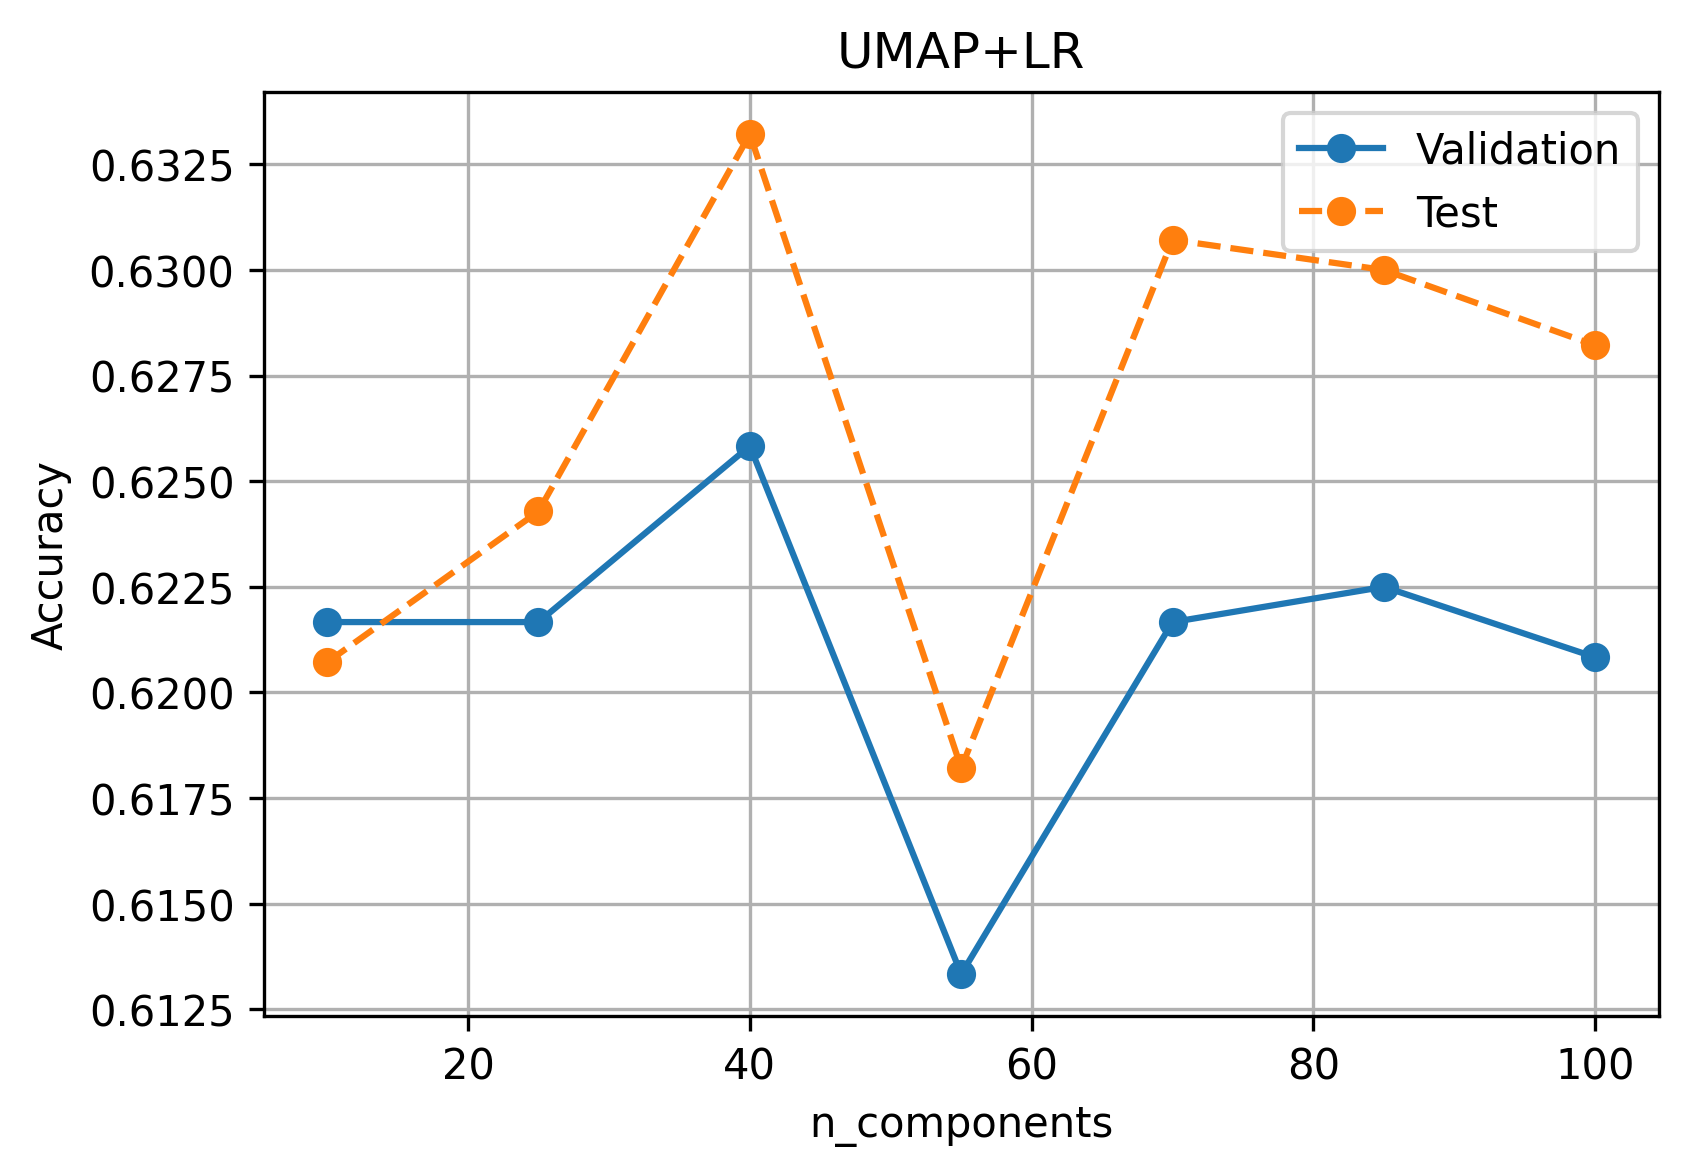

Tuning UMAP+ST: 100%|██████████| 7/7 [06:21<00:00, 54.48s/it]


UMAP+ST: best n_components = 85, val_acc = 0.4283, test_acc = 0.4354


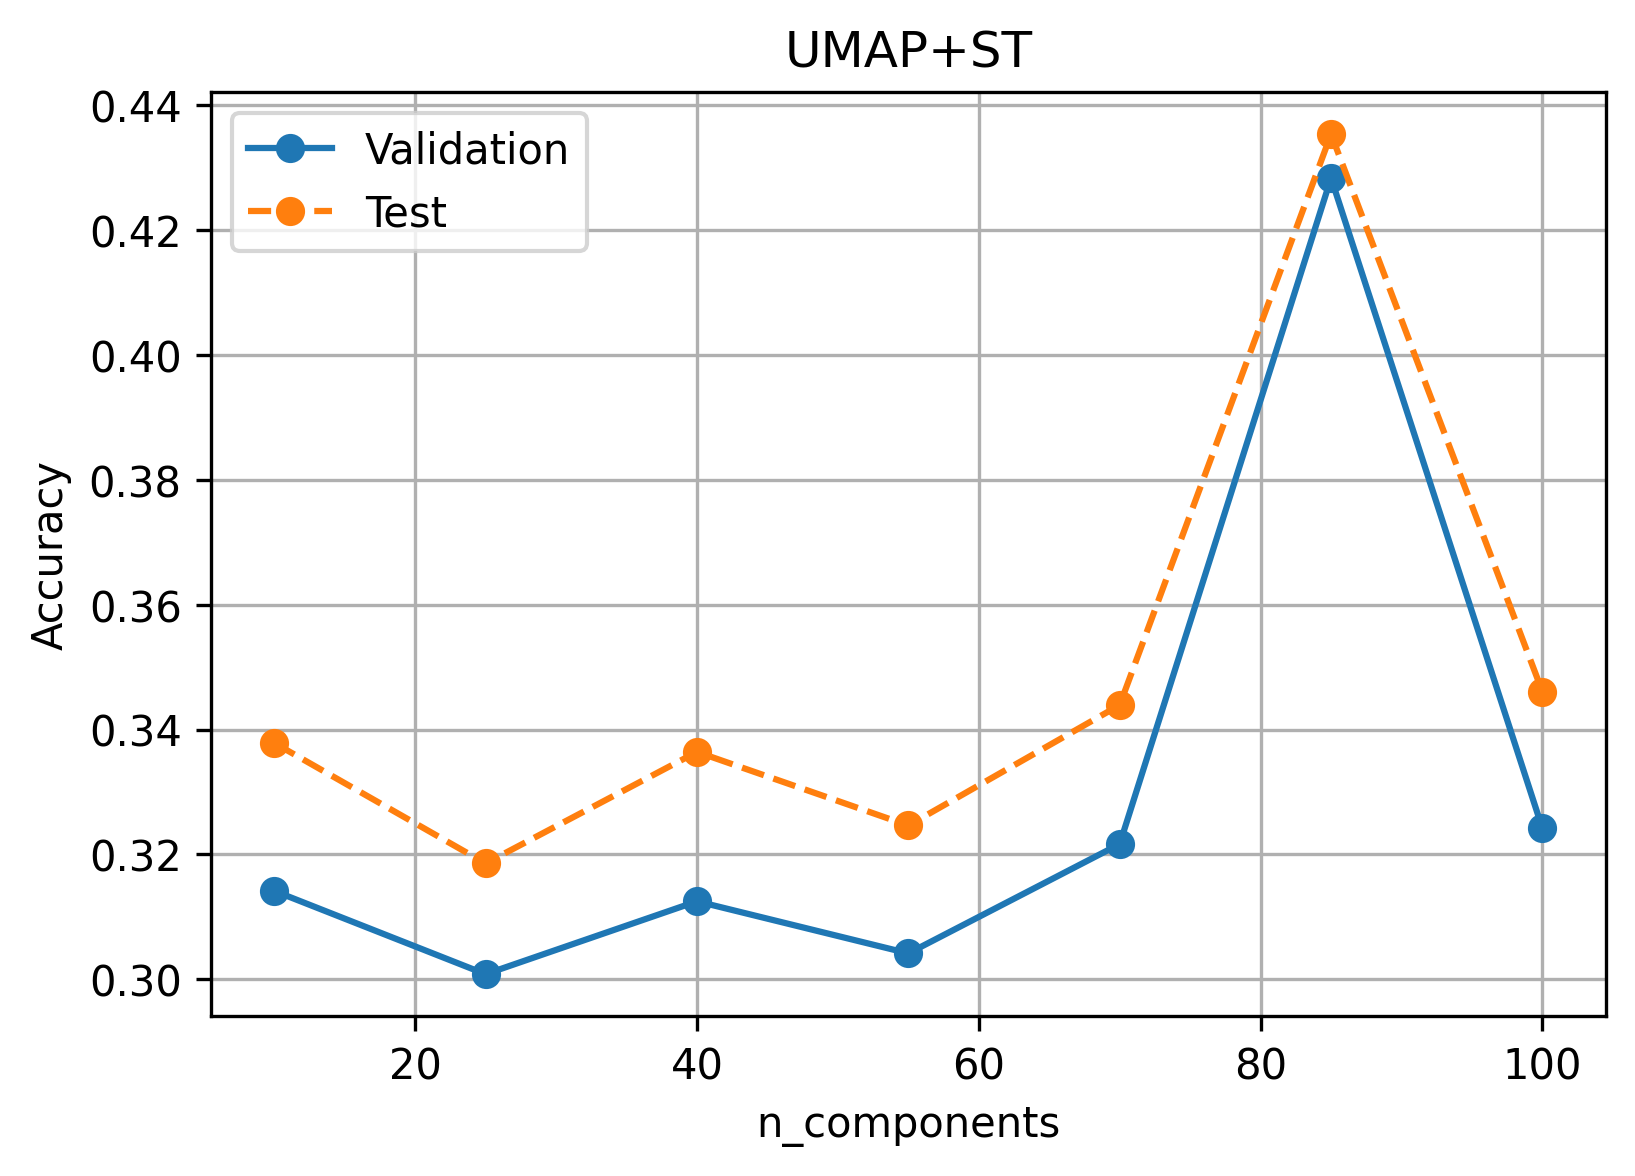

Tuning UMAP+KMeans:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Tuning UMAP+KMeans:  14%|█▍        | 1/7 [00:46<04:39, 46.52s/it]/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Tuning UMAP+KMeans:  29%|██▊       | 2/7 [02:10<05:43, 68.70s/it]/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=1

UMAP+KMeans: best n_components = 25, val_acc = 0.5933, test_acc = 0.5993


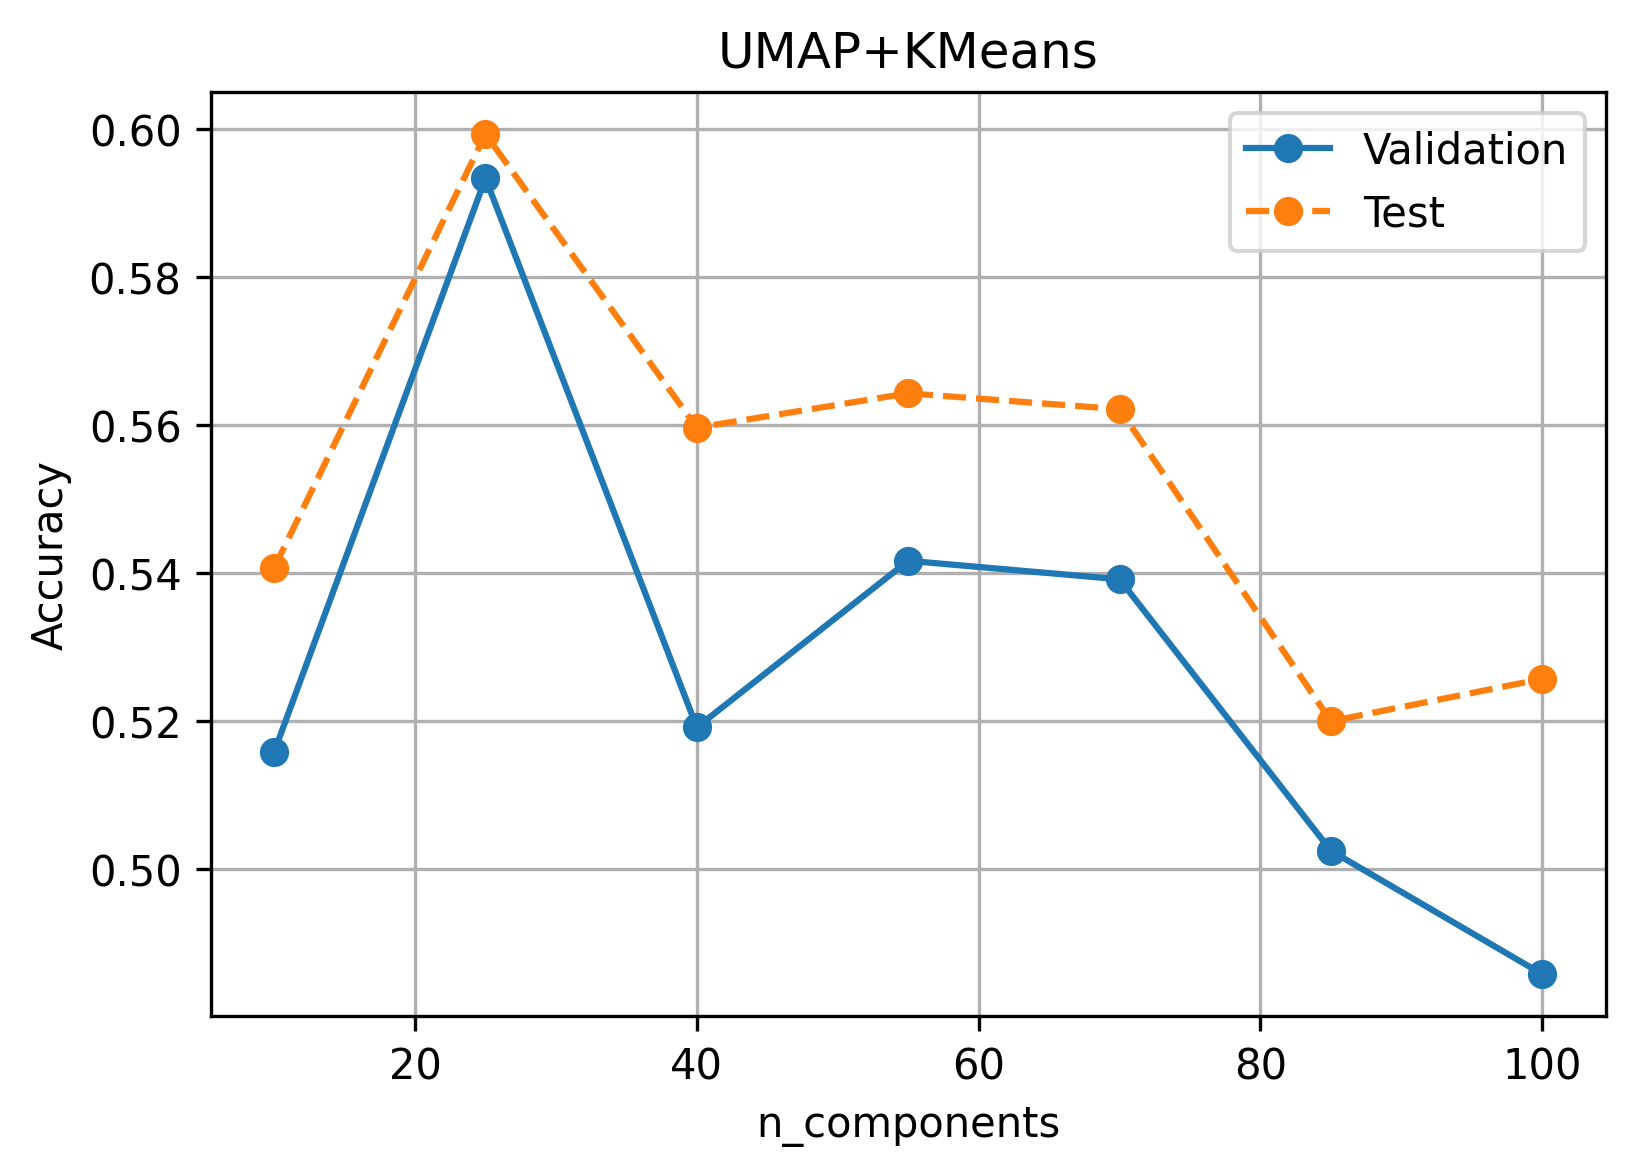

In [ ]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm  #для удобства и кайфа)

C_values = np.logspace(-5, 0, 15)
n_clusters_values = np.arange(10, 101, 10)
n_components_values = np.linspace(10, 100, 7, dtype=int)

best_params = {}

# юнинг на сырыхпризнаках
for name, model_type, grid, param_key in [
    ('Raw+LR',  'LogisticRegression',    C_values,          'C'),
    ('Raw+ST',  'SelfTraining',          C_values,          'C'),
    ('Raw+KMeans','KMeans',              n_clusters_values, 'n_clusters'),
]:
    val_accs, test_accs = [], []
    for p in tqdm(grid, desc=f"Tuning {name}"):
        kwargs = {param_key: p}
        model = MetaSemiSupervisedModel(
            data_processing=None,
            model_type=model_type,
            reducer_kwargs={},
            model_kwargs=kwargs
        )
        model.fit(X_train_semi, y_train_semi)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)
        val_accs.append(accuracy_score(y_val, y_val_pred))
        test_accs.append(accuracy_score(y_test, y_test_pred))

    best_idx = np.argmax(val_accs)
    best_p = grid[best_idx]
    best_params[name] = best_p
    print(f"{name}: best {param_key} = {best_p:.3g}, "
          f"val_acc = {val_accs[best_idx]:.4f}, "
          f"test_acc = {test_accs[best_idx]:.4f}")

    plt.figure(figsize=(6,4))
    plt.plot(grid, val_accs, 'o-', label='Validation')
    plt.plot(grid, test_accs, 'o--', label='Test')
    if param_key == 'C':
        plt.xscale('log')
    plt.xlabel(param_key)
    plt.ylabel('Accuracy')
    plt.title(f"{name}")
    plt.grid(True)
    plt.legend()
    plt.show()

# с UMAP
for name, model_type in [
    ('UMAP+LR',  'LogisticRegression'),
    ('UMAP+ST',  'SelfTraining'),
    ('UMAP+KMeans','KMeans'),
]:
    base_name = 'Raw+' + name.split('+')[1]
    base_p = best_params[base_name]
    val_accs, test_accs = [], []

    for n in tqdm(n_components_values, desc=f"Tuning {name}"):
        model = MetaSemiSupervisedModel(
            data_processing='UMAP',
            model_type=model_type,
            reducer_kwargs={'n_components': n},
            model_kwargs={('C' if model_type!='KMeans' else 'n_clusters'): base_p}
        )
        model.fit(X_train_semi, y_train_semi)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)
        val_accs.append(accuracy_score(y_val, y_val_pred))
        test_accs.append(accuracy_score(y_test, y_test_pred))

    best_idx = np.argmax(val_accs)
    best_n = n_components_values[best_idx]
    print(f"{name}: best n_components = {best_n}, "
          f"val_acc = {val_accs[best_idx]:.4f}, "
          f"test_acc = {test_accs[best_idx]:.4f}")

    plt.figure(figsize=(6,4))
    plt.plot(n_components_values, val_accs, 'o-', label='Validation')
    plt.plot(n_components_values, test_accs, 'o--', label='Test')
    plt.xlabel('n_components')
    plt.ylabel('Accuracy')
    plt.title(f"{name}")
    plt.grid(True)
    plt.legend()
    plt.show()


#### <font color='DarkOrange'>**Задание 1.6 [кросспроверка, 2 баллa][вопрос]**</font>

Опишите полученные результаты. Какая модель проявила себя лучше всего? Как влияет на результат снижение размерности признакового пространства?

<font color='MediumOrchid'>**Ваш ответ тут:**

Лучшая модель - Self‑Training на исходных признаках, благодаря псевдометкам она эффективнее учится на ограниченном наборе размеченных данных.

Применение UMAP приводит к снижению качества и часть важных признаков теряется при проекции в низкоразмерное пространство.

Может быть, стоит пересмотреть число компонент и параметры UMAP, а также дополнительно подобрать гиперпараметры до окончательной оценки.

#### <font color='DarkOrange'>**Задание 1.8 [кросспроверка, 1 балл][вопрос]**</font>

Как разные модели ведут себя в зависимости от объёма размеченных данных? Какой размер выборки достаточно разметить, чтобы получить близкое к максимальному качество? В каких случаях может быть выгодно использовать методы снижения размерности?

<font color='MediumOrchid'>**Ваш ответ тут:**

Поведение моделей с ростом размеченных данных:
* LR на сырых данных: точность растет по убывающей и  со временем добавление новых меток дает всё меньшую выгоду
* Sel-Training заметно опережает LR при небольшом числе меток за счёт псевдометок и по мере роста размеченных примеров эффект смягчается
* KMeans нуждается в большем объеме меток чтобы приблизиться к LR — на малых долях сильно отстает

Обычно после того, как размечено сильно больше половины обучающей выборки, дальнейший прирост становится малым.

Выгодно при шумных или очень высокоразмерных признаках, чтобы ускорить обучение и убрать лишние корреляции, для визуализации структуры данных в низкомерном пространстве; также иногда помогает улучшить качество псевдометок в Self-Training


----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

#### <font color='MediumSeaGreen'>**Задание 1.9 [бонус, 1 балл]**</font>

Вставьте картинку/музыку/текст и пр., описывающее ваше ощущение от погружения в ML :)

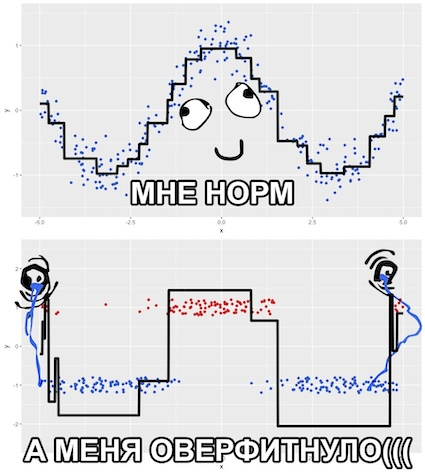

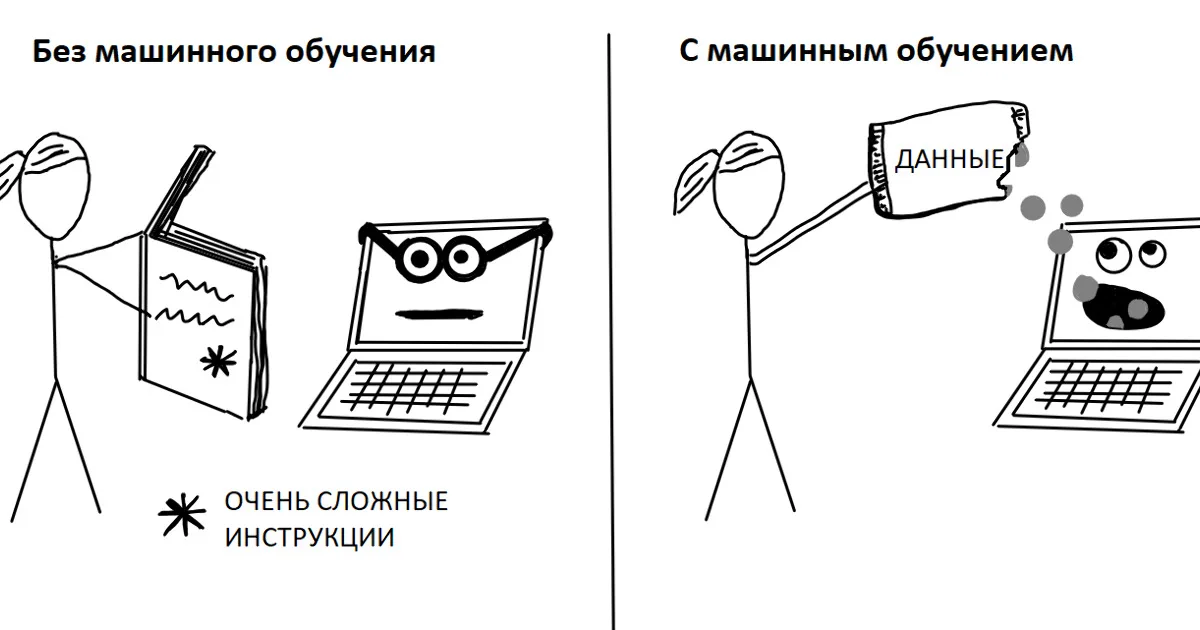